
### GroupBy

1. Compute the **total CO₂ emissions per continent** per year by joining `emissions` with `continents`.
2. Find the **top 3 entities by average annual emissions** within each continent.
3. For each continent, calculate the **percentage share of emissions** contributed by the top country vs. the rest for the year 2000.
4. Within each continent, identify the **first and last year** emissions were reported and the difference between them.
5. For each decade, compute the **mean, min, and max emissions** per continent.

---

### Custom `.apply`

6. Write a function that returns a row’s **emission growth rate vs. the previous year** and apply it within each entity group.
7. Within each continent group, apply a function that extracts the **entity with the largest single-year emission spike**.
8. Apply a custom function to compute a **rolling 5-year average emissions** for each entity.
9. Create a custom apply that flags whether an entity’s **emissions in a given year were above or below its long-term median**.
10. For each continent, apply a function that computes a **dictionary of summary stats** (`min`, `max`, `range`, `std`) across all entities.

---

### Melt & Pivot

11. Reshape the emissions dataset so that **years become columns** and emissions are values, with one row per entity.
12. Melt the reshaped table back to **long format** and ensure it matches the original dataset.
13. Pivot the data to show a **continent × year matrix**, with total emissions as values.
14. Create a pivot table showing **average emissions per continent per decade**, then melt it back into tidy form.
15. Make a wide table with **entities as rows and continents as columns**, where each value is that entity’s total emissions over all years.

---


In [86]:
import pandas as pd 

In [87]:
emissions = pd.read_csv('annual-co-emissions-by-region.csv')
continents = pd.read_csv('continents-according-to-our-world-in-data.csv')

In [88]:
emissions.shape
emissions.info()
emissions.describe()
emissions.columns
emissions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [89]:
conts = ['Africa','Europe','Asia','North America', 'South America', 'Antarctica', 'Australia']

In [90]:
continents.info()
continents.describe()
continents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Entity                           272 non-null    object
 1   Code                             257 non-null    object
 2   Year                             272 non-null    int64 
 3   World regions according to OWID  272 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.6+ KB


,Entity,Code,Year,World regions according to OWID
0,Afghanistan,AFG,2023,Asia
1,Aland Islands,ALA,2023,Europe
2,Albania,ALB,2023,Europe
3,Algeria,DZA,2023,Africa
4,American Samoa,ASM,2023,Oceania


In [91]:
emissions = emissions.merge(continents, on='Code', how='left', suffixes=('_em', '_cont'))

In [92]:
emissions.rename(columns={'Annual CO₂ emissions':'annual_emissions', 'World regions according to OWID':'continent'}, inplace=True)


In [93]:
emissions

,Entity_em,Code,Year_em,annual_emissions,Entity_cont,Year_cont,continent
0,Afghanistan,AFG,1949,14656.0,Afghanistan,2023.0,Asia
1,Afghanistan,AFG,1950,84272.0,Afghanistan,2023.0,Asia
2,Afghanistan,AFG,1951,91600.0,Afghanistan,2023.0,Asia
3,Afghanistan,AFG,1952,91600.0,Afghanistan,2023.0,Asia
4,Afghanistan,AFG,1953,106256.0,Afghanistan,2023.0,Asia
...,...,...,...,...,...,...,...
108092,Zimbabwe,ZWE,2019,10262950.0,Zimbabwe,2023.0,Africa
108093,Zimbabwe,ZWE,2020,8494503.0,Zimbabwe,2023.0,Africa
108094,Zimbabwe,ZWE,2021,10203630.0,Zimbabwe,2023.0,Africa
108095,Zimbabwe,ZWE,2022,10424940.0,Zimbabwe,2023.0,Africa


In [94]:
emissions.groupby(['continent'])['annual_emissions'].sum()

continent
Africa           1.711756e+13
Asia             1.766659e+13
Europe           7.734052e+13
North America    9.028917e+12
Oceania          2.215523e+10
South America    8.578828e+12
Name: annual_emissions, dtype: float64

In [95]:
avg_emissions = emissions.groupby(['continent', 'Entity_em'])['annual_emissions'].mean().reset_index()
avg_emissions

,continent,Entity_em,annual_emissions
0,Africa,Africa,3.756870e+08
1,Africa,Africa (GCP),3.022745e+08
2,Africa,Algeria,4.873787e+07
3,Africa,Angola,9.666763e+06
4,Africa,Asia,2.195719e+09
...,...,...,...
360,South America,South America (GCP),2.663666e+08
361,South America,Suriname,1.693519e+06
362,South America,Upper-middle-income countries,2.899448e+09
363,South America,Uruguay,2.791476e+06


In [96]:
top_3_per_continent = avg_emissions.groupby('continent').apply(
    lambda x: x.nlargest(3, 'annual_emissions')
).reset_index(drop=True)

top_3_per_continent

/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/4059330630.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_per_continent = avg_emissions.groupby('continent').apply(


,continent,Entity_em,annual_emissions
0,Africa,OECD (GCP),5.631716e+09
1,Africa,Non-OECD (GCP),4.499258e+09
2,Africa,High-income countries,4.161000e+09
3,Asia,OECD (GCP),5.631716e+09
4,Asia,Non-OECD (GCP),4.499258e+09
5,Asia,High-income countries,4.161000e+09
6,Europe,OECD (GCP),5.631716e+09
7,Europe,Non-OECD (GCP),4.499258e+09
8,Europe,High-income countries,4.161000e+09
9,North America,OECD (GCP),5.631716e+09


## Task 3: Percentage Share of Emissions (2000)

For each continent, calculate the percentage share of emissions contributed by the top country vs. the rest for the year 2000.


In [97]:
# Task 3: Percentage share of emissions for year 2000
emissions_2000 = emissions[emissions['Year_em'] == 2000].copy()

# Calculate total emissions per continent for 2000
continent_totals_2000 = emissions_2000.groupby('continent')['annual_emissions'].sum()

# Find top entity per continent for 2000
top_entity_per_continent = emissions_2000.groupby('continent').apply(
    lambda x: x.loc[x['annual_emissions'].idxmax()]
).reset_index(drop=True)

# Calculate percentage share
percentage_analysis = []
for _, row in top_entity_per_continent.iterrows():
    continent = row['continent']
    top_entity_emissions = row['annual_emissions']
    total_continent_emissions = continent_totals_2000[continent]
    
    top_share = (top_entity_emissions / total_continent_emissions) * 100
    rest_share = 100 - top_share
    
    percentage_analysis.append({
        'continent': continent,
        'top_entity': row['Entity_em'],
        'top_entity_emissions': top_entity_emissions,
        'total_continent_emissions': total_continent_emissions,
        'top_entity_share_pct': top_share,
        'rest_share_pct': rest_share
    })

percentage_df = pd.DataFrame(percentage_analysis)
percentage_df


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/487092562.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entity_per_continent = emissions_2000.groupby('continent').apply(


,continent,top_entity,top_entity_emissions,total_continent_emissions,top_entity_share_pct,rest_share_pct
0,Africa,High-income countries,1.544957e+10,2.364843e+11,6.533021,93.466979
1,Asia,High-income countries,1.544957e+10,2.448903e+11,6.308772,93.691228
2,Europe,High-income countries,1.544957e+10,1.066145e+12,1.449106,98.550894
3,North America,High-income countries,1.544957e+10,1.248751e+11,12.372021,87.627979
4,Oceania,Australia,3.500080e+08,3.900799e+08,89.727260,10.272740
5,South America,High-income countries,1.544957e+10,1.185891e+11,13.027809,86.972191


## Task 4: First and Last Year Analysis

Within each continent, identify the first and last year emissions were reported and the difference between them.


In [98]:
# Task 4: First and last year analysis per continent
year_analysis = emissions.groupby('continent')['Year_em'].agg(['min', 'max']).reset_index()
year_analysis.columns = ['continent', 'first_year', 'last_year']
year_analysis['year_span'] = year_analysis['last_year'] - year_analysis['first_year']

# Add emission values for first and last years
first_year_emissions = emissions.groupby('continent').apply(
    lambda x: x[x['Year_em'] == x['Year_em'].min()]['annual_emissions'].sum()
).reset_index()
first_year_emissions.columns = ['continent', 'first_year_total_emissions']

last_year_emissions = emissions.groupby('continent').apply(
    lambda x: x[x['Year_em'] == x['Year_em'].max()]['annual_emissions'].sum()
).reset_index()
last_year_emissions.columns = ['continent', 'last_year_total_emissions']

# Merge all data
year_analysis = year_analysis.merge(first_year_emissions, on='continent')
year_analysis = year_analysis.merge(last_year_emissions, on='continent')

# Calculate emission growth
year_analysis['emission_growth'] = year_analysis['last_year_total_emissions'] - year_analysis['first_year_total_emissions']
year_analysis['emission_growth_pct'] = ((year_analysis['last_year_total_emissions'] - year_analysis['first_year_total_emissions']) / year_analysis['first_year_total_emissions']) * 100

year_analysis


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/2455428413.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_year_emissions = emissions.groupby('continent').apply(
/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/2455428413.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_year_emissions = emissions.groupby('continent').apply(


,continent,first_year,last_year,year_span,first_year_total_emissions,last_year_total_emissions,emission_growth,emission_growth_pct
0,Africa,1750,2023,273,74447496.0,3.347189e+11,3.346445e+11,4.495040e+05
1,Asia,1750,2023,273,74447496.0,3.559004e+11,3.558260e+11,4.779556e+05
2,Europe,1750,2023,273,344319669.0,1.504844e+12,1.504500e+12,4.369486e+05
3,North America,1750,2023,273,37223748.0,1.727737e+11,1.727364e+11,4.640490e+05
4,Oceania,1750,2023,273,0.0,4.303027e+08,4.303027e+08,inf
5,South America,1750,2023,273,37223748.0,1.677591e+11,1.677218e+11,4.505775e+05


## Task 5: Decade Analysis

For each decade, compute the mean, min, and max emissions per continent.


In [99]:
# Task 5: Decade analysis
# Create decade column
emissions['decade'] = (emissions['Year_em'] // 10) * 10

# Calculate statistics per decade per continent
decade_stats = emissions.groupby(['decade', 'continent'])['annual_emissions'].agg(['mean', 'min', 'max', 'sum']).reset_index()
decade_stats.columns = ['decade', 'continent', 'mean_emissions', 'min_emissions', 'max_emissions', 'total_emissions']

# Pivot for better visualization
decade_pivot = decade_stats.pivot(index='continent', columns='decade', values='mean_emissions')
decade_pivot


decade,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
continent,,,,,,,,,,,,,,,,,,,,,
Africa,4895746.7,5.786104e+06,7.132103e+06,7.895321e+06,8.340172e+06,1.224498e+07,1.605818e+07,2.129888e+07,3.161513e+07,4.936003e+07,...,6.396892e+08,7.789119e+08,6.967289e+08,1.030044e+09,1.577452e+09,1.836879e+09,1.967920e+09,2.306051e+09,2.757581e+09,2.851558e+09
Asia,4607761.6,5.445745e+06,6.712568e+06,7.479778e+06,7.971138e+06,1.171259e+07,1.536000e+07,2.037284e+07,2.683878e+07,4.732035e+07,...,4.946361e+08,5.964076e+08,7.275492e+08,1.084550e+09,1.635867e+09,1.942233e+09,2.111603e+09,2.489686e+09,3.015766e+09,3.136845e+09
Europe,4895746.7,5.786104e+06,7.132103e+06,7.919086e+06,8.331805e+06,1.204797e+07,1.569277e+07,2.063402e+07,2.917784e+07,4.588699e+07,...,6.577582e+08,8.166725e+08,1.101941e+09,1.668488e+09,2.586972e+09,3.049975e+09,3.269676e+09,3.805810e+09,4.543927e+09,4.695747e+09
North America,4895746.7,5.786104e+06,7.132103e+06,7.479971e+06,7.633689e+06,1.038670e+07,1.363377e+07,1.811232e+07,2.731745e+07,4.291175e+07,...,4.857873e+08,6.177546e+08,6.643269e+08,9.740045e+08,1.489765e+09,1.738893e+09,1.852366e+09,2.175192e+09,2.570620e+09,2.646267e+09
Oceania,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.786000e+02,1.222750e+03,2.381500e+03,8.388250e+03,2.753165e+04,...,1.649936e+07,2.370453e+07,9.058998e+06,9.931950e+06,1.281087e+07,1.670112e+07,1.823204e+07,2.248572e+07,2.400730e+07,2.306131e+07
South America,4895746.7,5.786104e+06,7.132103e+06,7.895321e+06,8.340172e+06,1.224498e+07,1.605818e+07,2.129888e+07,3.161513e+07,4.693528e+07,...,5.434261e+08,6.768320e+08,8.925247e+08,1.359030e+09,2.107180e+09,2.482563e+09,2.701702e+09,3.165633e+09,3.786442e+09,3.912490e+09


## Custom .apply Tasks

### Task 6: Emission Growth Rate Function

Write a function that returns a row's emission growth rate vs. the previous year and apply it within each entity group.


In [100]:
# Task 6: Emission growth rate function
def calculate_growth_rate(group):
    """Calculate year-over-year growth rate for each entity"""
    group = group.sort_values('Year_em')
    group['prev_year_emissions'] = group['annual_emissions'].shift(1)
    group['growth_rate'] = ((group['annual_emissions'] - group['prev_year_emissions']) / group['prev_year_emissions']) * 100
    return group

# Apply growth rate calculation to each entity
emissions_with_growth = emissions.groupby('Entity_em').apply(calculate_growth_rate).reset_index(drop=True)

# Show sample results
sample_growth = emissions_with_growth[emissions_with_growth['Entity_em'] == 'United States'].head(10)
sample_growth[['Entity_em', 'Year_em', 'annual_emissions', 'growth_rate']]


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/3894361360.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emissions_with_growth = emissions.groupby('Entity_em').apply(calculate_growth_rate).reset_index(drop=True)


,Entity_em,Year_em,annual_emissions,growth_rate
103998,United States,1800,252815.98,NaN
103999,United States,1801,267472.00,5.797110
104000,United States,1802,289456.00,8.219178
104001,United States,1803,296784.00,2.531646
104002,United States,1804,333424.00,12.345679
104003,United States,1805,340752.00,2.197802
104004,United States,1806,333424.00,-2.150538
104005,United States,1807,377392.00,13.186813
104006,United States,1808,392048.00,3.883495
104007,United States,1809,403040.00,2.803738


### Task 7: Largest Single-Year Emission Spike

Within each continent group, apply a function that extracts the entity with the largest single-year emission spike.


In [101]:
# Task 7: Largest single-year emission spike per continent
def find_largest_spike(group):
    """Find the entity with the largest single-year emission spike within a continent"""
    # Calculate growth rates for all entities in this continent
    continent_growth = group.groupby('Entity_em').apply(calculate_growth_rate).reset_index(drop=True)
    
    # Find the maximum growth rate
    max_growth_idx = continent_growth['growth_rate'].idxmax()
    return continent_growth.loc[max_growth_idx]

# Apply to each continent
largest_spikes = emissions_with_growth.groupby('continent').apply(find_largest_spike).reset_index(drop=True)
largest_spikes[['continent', 'Entity_em', 'Year_em', 'annual_emissions', 'growth_rate']]


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/4253552633.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continent_growth = group.groupby('Entity_em').apply(calculate_growth_rate).reset_index(drop=True)
/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/4253552633.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continent_growth = group.groupby('Entity_em').apply(calculate_grow

,continent,Entity_em,Year_em,annual_emissions,growth_rate
0,Africa,Africa (GCP),1884,21984.0,inf
1,Asia,Africa (GCP),1884,21984.0,inf
2,Europe,Africa (GCP),1884,21984.0,inf
3,North America,Africa (GCP),1884,21984.0,inf
4,Oceania,Australia,1805,236.0,inf
5,South America,Africa (GCP),1884,21984.0,inf


### Task 8: Rolling 5-Year Average Emissions

Apply a custom function to compute a rolling 5-year average emissions for each entity.


In [102]:
# Task 8: Rolling 5-year average emissions
def calculate_rolling_average(group):
    """Calculate rolling 5-year average emissions for each entity"""
    group = group.sort_values('Year_em')
    group['rolling_5yr_avg'] = group['annual_emissions'].rolling(window=5, min_periods=1).mean()
    return group

# Apply rolling average calculation to each entity
emissions_with_rolling = emissions.groupby('Entity_em').apply(calculate_rolling_average).reset_index(drop=True)

# Show sample results for a few countries
sample_rolling = emissions_with_rolling[emissions_with_rolling['Entity_em'].isin(['United States', 'China', 'Germany'])].head(15)
sample_rolling[['Entity_em', 'Year_em', 'annual_emissions', 'rolling_5yr_avg']]


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/1108994423.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emissions_with_rolling = emissions.groupby('Entity_em').apply(calculate_rolling_average).reset_index(drop=True)


,Entity_em,Year_em,annual_emissions,rolling_5yr_avg
22547,China,1907,19893872.0,1.989387e+07
22548,China,1908,22735854.0,2.131486e+07
22549,China,1909,24251576.0,2.229377e+07
22550,China,1910,25009438.0,2.297268e+07
22551,China,1911,24630506.0,2.330425e+07
22552,China,1912,17029154.0,2.273131e+07
22553,China,1913,24251576.0,2.303445e+07
22554,China,1914,26718416.0,2.352782e+07
22555,China,1915,25420578.0,2.361005e+07
22556,China,1916,30130690.0,2.471008e+07


### Task 9: Above/Below Median Flag

Create a custom apply that flags whether an entity's emissions in a given year were above or below its long-term median.


In [103]:
# Task 9: Above/below median flag
def flag_above_below_median(group):
    """Flag whether emissions in each year are above or below the entity's long-term median"""
    group = group.sort_values('Year_em')
    median_emissions = group['annual_emissions'].median()
    group['above_median'] = group['annual_emissions'] > median_emissions
    group['median_emissions'] = median_emissions
    return group

# Apply median flagging to each entity
emissions_with_median_flag = emissions.groupby('Entity_em').apply(flag_above_below_median).reset_index(drop=True)

# Show sample results
sample_median = emissions_with_median_flag[emissions_with_median_flag['Entity_em'] == 'United States'].head(10)
sample_median[['Entity_em', 'Year_em', 'annual_emissions', 'median_emissions', 'above_median']]


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/873880430.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emissions_with_median_flag = emissions.groupby('Entity_em').apply(flag_above_below_median).reset_index(drop=True)


,Entity_em,Year_em,annual_emissions,median_emissions,above_median
103998,United States,1800,252815.98,1.265124e+09,False
103999,United States,1801,267472.00,1.265124e+09,False
104000,United States,1802,289456.00,1.265124e+09,False
104001,United States,1803,296784.00,1.265124e+09,False
104002,United States,1804,333424.00,1.265124e+09,False
104003,United States,1805,340752.00,1.265124e+09,False
104004,United States,1806,333424.00,1.265124e+09,False
104005,United States,1807,377392.00,1.265124e+09,False
104006,United States,1808,392048.00,1.265124e+09,False
104007,United States,1809,403040.00,1.265124e+09,False


### Task 10: Summary Statistics Dictionary

For each continent, apply a function that computes a dictionary of summary stats (min, max, range, std) across all entities.


In [104]:
# Task 10: Summary statistics dictionary per continent
def compute_summary_stats(group):
    """Compute summary statistics dictionary for a continent"""
    stats = {
        'min_emissions': group['annual_emissions'].min(),
        'max_emissions': group['annual_emissions'].max(),
        'range_emissions': group['annual_emissions'].max() - group['annual_emissions'].min(),
        'std_emissions': group['annual_emissions'].std(),
        'mean_emissions': group['annual_emissions'].mean(),
        'median_emissions': group['annual_emissions'].median(),
        'total_entities': group['Entity_em'].nunique(),
        'total_years': group['Year_em'].nunique()
    }
    return pd.Series(stats)

# Apply summary stats to each continent
continent_summary_stats = emissions.groupby('continent').apply(compute_summary_stats).reset_index()
continent_summary_stats


/var/folders/cm/46nnvpl978b_vb10b1dp7rp80000gn/T/ipykernel_89316/20573048.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continent_summary_stats = emissions.groupby('continent').apply(compute_summary_stats).reset_index()


,continent,min_emissions,max_emissions,range_emissions,std_emissions,mean_emissions,median_emissions,total_entities,total_years
0,Africa,0.0,2.544220e+10,2.544220e+10,2.780850e+09,1.106715e+09,30004424.0,85.0,274.0
1,Asia,0.0,2.544220e+10,2.544220e+10,2.706103e+09,1.060228e+09,41944856.0,81.0,274.0
2,Europe,0.0,2.544220e+10,2.544220e+10,3.007969e+09,1.346668e+09,104404460.0,74.0,274.0
3,North America,0.0,2.544220e+10,2.544220e+10,2.588190e+09,9.700168e+08,13627125.0,64.0,274.0
4,Oceania,0.0,4.157698e+08,4.157698e+08,5.887842e+07,1.425690e+07,124576.0,19.0,274.0
5,South America,0.0,2.544220e+10,2.544220e+10,2.837649e+09,1.165127e+09,50160850.0,42.0,274.0


## Melt & Pivot Tasks

### Task 11: Reshape Data - Years as Columns

Reshape the emissions dataset so that years become columns and emissions are values, with one row per entity.


In [105]:
# Task 11: Reshape data - years as columns
# Create a clean dataset for pivoting
pivot_data = emissions[['Entity_em', 'Year_em', 'annual_emissions', 'continent']].copy()

# Pivot the data
emissions_wide = pivot_data.pivot_table(
    index=['Entity_em', 'continent'], 
    columns='Year_em', 
    values='annual_emissions', 
    fill_value=0
).reset_index()

# Flatten column names
emissions_wide.columns.name = None
emissions_wide.columns = ['Entity_em', 'continent'] + [str(col) for col in emissions_wide.columns[2:]]

print(f"Shape of wide format: {emissions_wide.shape}")
emissions_wide.head()


Shape of wide format: (365, 276)


,Entity_em,continent,1750,1751,1752,1753,1754,1755,1756,1757,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.086037e+06,9.670181e+06,8.906380e+06,9.677441e+06,1.060188e+07,1.082514e+07,1.160593e+07,1.027188e+07,1.055780e+07,1.102022e+07
1,Africa,Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.357349e+09,1.332662e+09,1.375132e+09,1.393216e+09,1.386654e+09,1.479412e+09,1.355782e+09,1.441534e+09,1.432503e+09,1.418739e+09
2,Africa,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.357349e+09,1.332662e+09,1.375132e+09,1.393216e+09,1.386654e+09,1.479412e+09,1.355782e+09,1.441534e+09,1.432503e+09,1.418739e+09
3,Africa,Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.357349e+09,1.332662e+09,1.375132e+09,1.393216e+09,1.386654e+09,1.479412e+09,1.355782e+09,1.441534e+09,1.432503e+09,1.418739e+09
4,Africa,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.357349e+09,1.332662e+09,1.375132e+09,1.393216e+09,1.386654e+09,1.479412e+09,1.355782e+09,1.441534e+09,1.432503e+09,1.418739e+09


### Task 12: Melt Back to Long Format

Melt the reshaped table back to long format and ensure it matches the original dataset.


In [106]:
# Task 12: Melt back to long format
# Melt the wide format back to long format
emissions_melted = pd.melt(
    emissions_wide, 
    id_vars=['Entity_em', 'continent'], 
    var_name='Year_em', 
    value_name='annual_emissions'
)

# Convert year column back to integer
emissions_melted['Year_em'] = emissions_melted['Year_em'].astype(int)

# Sort and compare with original
emissions_melted = emissions_melted.sort_values(['Entity_em', 'Year_em']).reset_index(drop=True)
original_sorted = emissions[['Entity_em', 'Year_em', 'annual_emissions', 'continent']].sort_values(['Entity_em', 'Year_em']).reset_index(drop=True)

print(f"Shape of melted data: {emissions_melted.shape}")
print(f"Shape of original data: {original_sorted.shape}")
print(f"Data matches: {emissions_melted.equals(original_sorted)}")

emissions_melted.head()


Shape of melted data: (100010, 4)
Shape of original data: (108097, 4)
Data matches: False


,Entity_em,continent,Year_em,annual_emissions
0,Afghanistan,Asia,1750,0.0
1,Afghanistan,Asia,1751,0.0
2,Afghanistan,Asia,1752,0.0
3,Afghanistan,Asia,1753,0.0
4,Afghanistan,Asia,1754,0.0


### Task 13: Continent × Year Matrix

Pivot the data to show a continent × year matrix, with total emissions as values.


In [107]:
# Task 13: Continent × Year matrix
continent_year_matrix = emissions.pivot_table(
    index='continent', 
    columns='Year_em', 
    values='annual_emissions', 
    aggfunc='sum',
    fill_value=0
)

print(f"Shape of continent-year matrix: {continent_year_matrix.shape}")
continent_year_matrix.head()


Shape of continent-year matrix: (6, 274)


Year_em,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
continent,,,,,,,,,,,,,,,,,,,,,
Africa,74447496.0,75257832.0,76041344.0,76883920.0,77868640.0,78347744.0,79279312.0,80751488.0,81730864.0,82710832.0,...,3.167375e+11,3.164499e+11,3.166580e+11,3.216164e+11,3.274737e+11,3.301426e+11,3.141885e+11,3.305866e+11,3.322225e+11,3.347189e+11
Asia,74447496.0,75257832.0,76041344.0,76883920.0,77868640.0,78347744.0,79279312.0,80751488.0,81730864.0,82710832.0,...,3.343202e+11,3.341647e+11,3.344756e+11,3.399607e+11,3.464225e+11,3.495524e+11,3.334676e+11,3.507854e+11,3.526058e+11,3.559004e+11
Europe,344319669.0,348067473.0,351691216.0,355588130.0,360142460.0,362358316.0,366666818.0,373475632.0,378005246.0,382537598.0,...,1.424822e+12,1.423644e+12,1.424375e+12,1.446640e+12,1.473009e+12,1.484421e+12,1.412774e+12,1.486457e+12,1.493784e+12,1.504844e+12
North America,37223748.0,37628916.0,38020672.0,38441960.0,38934320.0,39173872.0,39639656.0,40375744.0,40865432.0,41355416.0,...,1.644448e+11,1.641627e+11,1.641086e+11,1.665295e+11,1.696413e+11,1.708250e+11,1.622430e+11,1.707653e+11,1.716625e+11,1.727737e+11
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.428593e+08,4.520789e+08,4.606082e+08,4.653698e+08,4.686240e+08,4.700514e+08,4.496670e+08,4.396616e+08,4.330285e+08,4.303027e+08


### Task 14: Average Emissions per Continent per Decade

Create a pivot table showing average emissions per continent per decade, then melt it back into tidy form.


In [108]:
# Task 14: Average emissions per continent per decade
# Create pivot table for decades
decade_pivot_table = emissions.pivot_table(
    index='continent', 
    columns='decade', 
    values='annual_emissions', 
    aggfunc='mean',
    fill_value=0
)

print("Decade Pivot Table:")
print(decade_pivot_table)

# Melt back to tidy form
decade_tidy = pd.melt(
    decade_pivot_table.reset_index(), 
    id_vars='continent', 
    var_name='decade', 
    value_name='avg_emissions'
)

print("\nDecade Tidy Format:")
decade_tidy


Decade Pivot Table:
decade              1750          1760          1770          1780  \
continent                                                            
Africa         4895746.7  5.786104e+06  7.132103e+06  7.895321e+06   
Asia           4607761.6  5.445745e+06  6.712568e+06  7.479778e+06   
Europe         4895746.7  5.786104e+06  7.132103e+06  7.919086e+06   
North America  4895746.7  5.786104e+06  7.132103e+06  7.479971e+06   
Oceania              0.0  0.000000e+00  0.000000e+00  0.000000e+00   
South America  4895746.7  5.786104e+06  7.132103e+06  7.895321e+06   

decade                 1790          1800          1810          1820  \
continent                                                               
Africa         8.340172e+06  1.224498e+07  1.605818e+07  2.129888e+07   
Asia           7.971138e+06  1.171259e+07  1.536000e+07  2.037284e+07   
Europe         8.331805e+06  1.204797e+07  1.569277e+07  2.063402e+07   
North America  7.633689e+06  1.038670e+07  1.363377e+0

,continent,decade,avg_emissions
0,Africa,1750,4.895747e+06
1,Asia,1750,4.607762e+06
2,Europe,1750,4.895747e+06
3,North America,1750,4.895747e+06
4,Oceania,1750,0.000000e+00
...,...,...,...
163,Asia,2020,3.136845e+09
164,Europe,2020,4.695747e+09
165,North America,2020,2.646267e+09
166,Oceania,2020,2.306131e+07


### Task 15: Entities × Continents Wide Table

Make a wide table with entities as rows and continents as columns, where each value is that entity's total emissions over all years.


In [109]:
# Task 15: Entities × Continents wide table
# Calculate total emissions per entity per continent
entity_continent_totals = emissions.groupby(['Entity_em', 'continent'])['annual_emissions'].sum().reset_index()

# Pivot to create entities × continents matrix
entity_continent_matrix = entity_continent_totals.pivot(
    index='Entity_em', 
    columns='continent', 
    values='annual_emissions'
).fillna(0)

print(f"Shape of entity-continent matrix: {entity_continent_matrix.shape}")
entity_continent_matrix.head(10)


Shape of entity-continent matrix: (245, 6)


continent,Africa,Asia,Europe,North America,Oceania,South America
Entity_em,,,,,,
Afghanistan,0.000000e+00,2.368414e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Africa,1.051923e+11,1.051923e+11,4.733656e+11,5.259617e+10,0.0,5.259617e+10
Africa (GCP),1.051915e+11,1.051915e+11,4.733618e+11,5.259576e+10,0.0,5.259576e+10
Albania,0.000000e+00,0.000000e+00,3.041735e+08,0.000000e+00,0.0,0.000000e+00
Algeria,5.263690e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Andorra,0.000000e+00,0.000000e+00,1.623590e+07,0.000000e+00,0.0,0.000000e+00
Angola,7.153404e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Anguilla,0.000000e+00,0.000000e+00,0.000000e+00,3.478081e+06,0.0,0.000000e+00
Antigua and Barbuda,0.000000e+00,0.000000e+00,0.000000e+00,2.626119e+07,0.0,0.000000e+00


In [110]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('default')  # Use default style instead of seaborn-v0_8
sns.set_palette("husl")


## Data Visualizations

### 1. Total Emissions by Continent Over Time


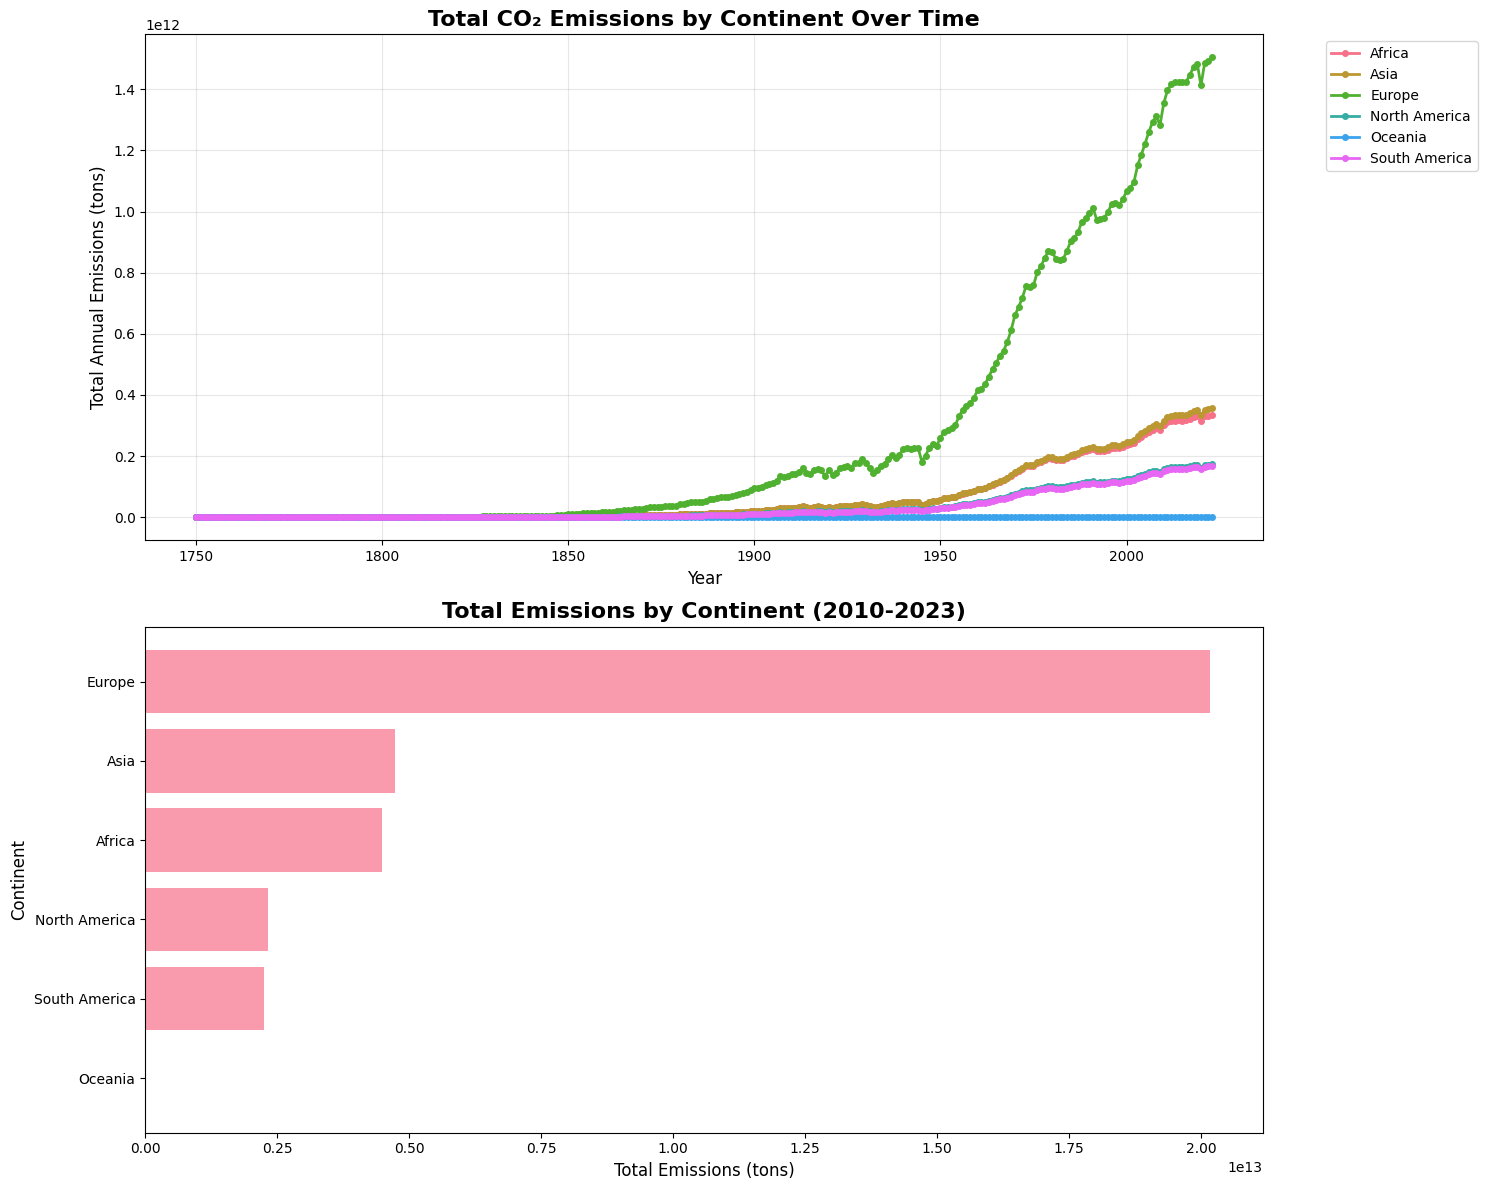

In [111]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

continent_yearly = emissions.groupby(['continent', 'Year_em'])['annual_emissions'].sum().reset_index()

for continent in continent_yearly['continent'].unique():
    continent_data = continent_yearly[continent_yearly['continent'] == continent]
    ax1.plot(continent_data['Year_em'], continent_data['annual_emissions'], 
             label=continent, linewidth=2, marker='o', markersize=4)

ax1.set_title('Total CO₂ Emissions by Continent Over Time', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Annual Emissions (tons)', fontsize=12)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

recent_data = continent_yearly[continent_yearly['Year_em'] >= 2010]
continent_totals_recent = recent_data.groupby('continent')['annual_emissions'].sum().sort_values(ascending=True)

ax2.barh(continent_totals_recent.index, continent_totals_recent.values, alpha=0.7)
ax2.set_title('Total Emissions by Continent (2010-2023)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Total Emissions (tons)', fontsize=12)
ax2.set_ylabel('Continent', fontsize=12)

plt.tight_layout()
plt.savefig('emissions_by_continent.png', dpi=300, bbox_inches='tight')
plt.show()


### 2. Top 3 Entities per Continent Analysis


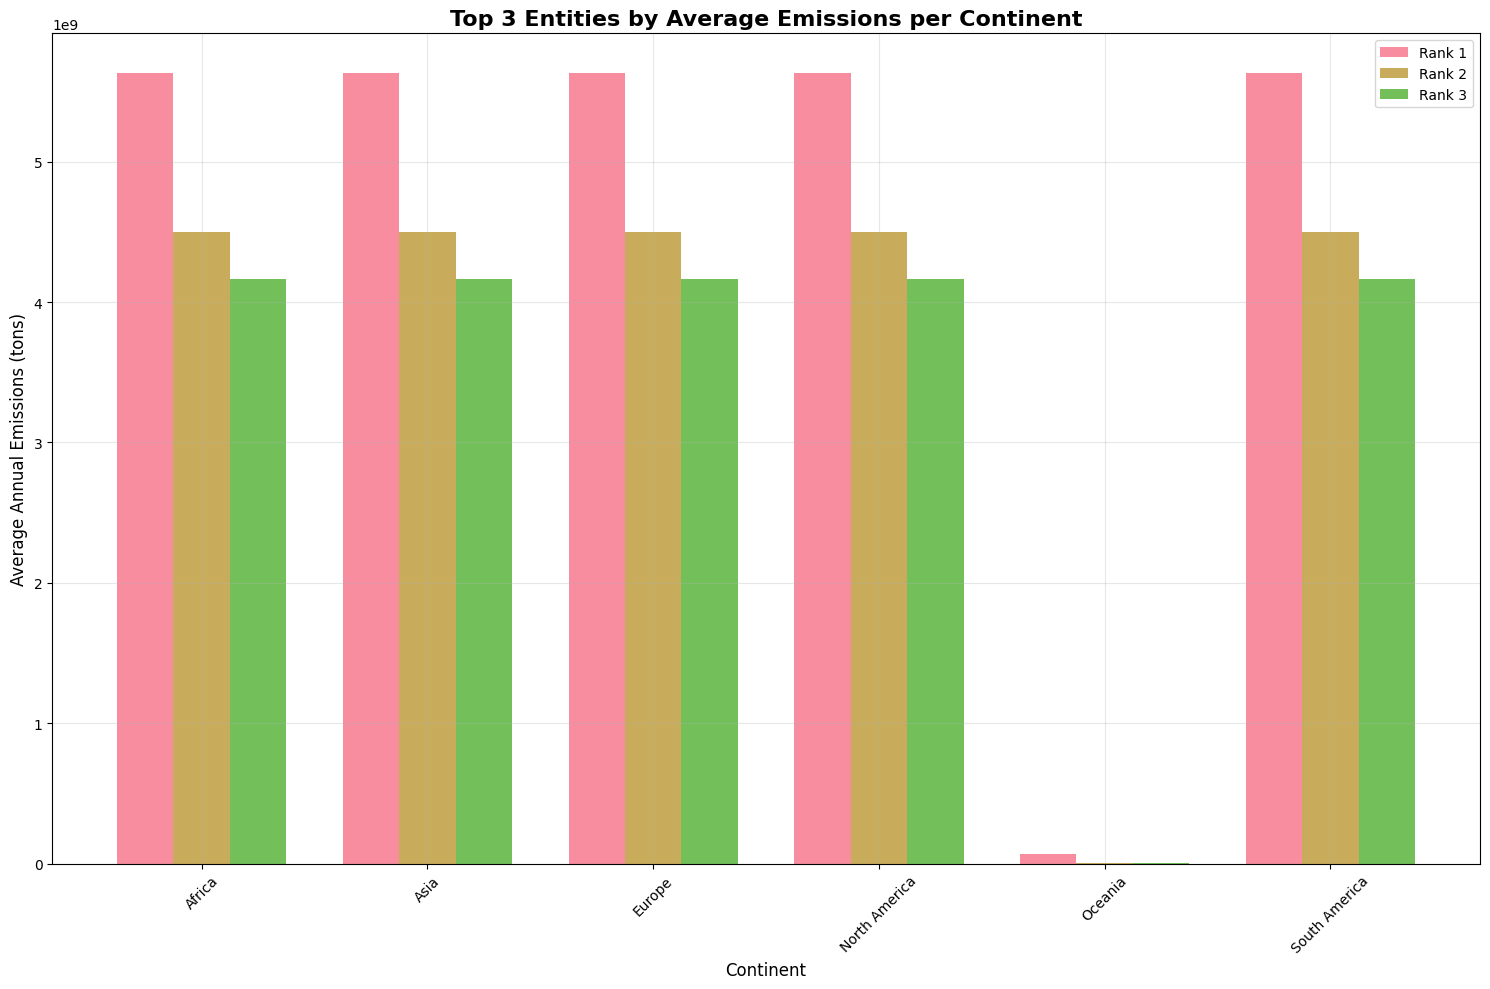


Top 3 Entities per Continent:

Africa:
  OECD (GCP): 5,631,715,899 tons
  Non-OECD (GCP): 4,499,257,755 tons
  High-income countries: 4,160,999,563 tons

Asia:
  OECD (GCP): 5,631,715,899 tons
  Non-OECD (GCP): 4,499,257,755 tons
  High-income countries: 4,160,999,563 tons

Europe:
  OECD (GCP): 5,631,715,899 tons
  Non-OECD (GCP): 4,499,257,755 tons
  High-income countries: 4,160,999,563 tons

North America:
  OECD (GCP): 5,631,715,899 tons
  Non-OECD (GCP): 4,499,257,755 tons
  High-income countries: 4,160,999,563 tons

Oceania:
  Australia: 71,767,518 tons
  New Zealand: 7,219,872 tons
  Papua New Guinea: 2,725,828 tons

South America:
  OECD (GCP): 5,631,715,899 tons
  Non-OECD (GCP): 4,499,257,755 tons
  High-income countries: 4,160,999,563 tons


In [112]:
fig, ax = plt.subplots(figsize=(15, 10))

continents = top_3_per_continent['continent'].unique()
x = np.arange(len(continents))
width = 0.25

for i, rank in enumerate([1, 2, 3]):
    rank_data = []
    for continent in continents:
        continent_rank = top_3_per_continent[
            (top_3_per_continent['continent'] == continent) & 
            (top_3_per_continent.groupby('continent').cumcount() == rank-1)
        ]
        if not continent_rank.empty:
            rank_data.append(continent_rank['annual_emissions'].iloc[0])
        else:
            rank_data.append(0)
    
    ax.bar(x + i*width, rank_data, width, label=f'Rank {rank}', alpha=0.8)

ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Average Annual Emissions (tons)', fontsize=12)
ax.set_title('Top 3 Entities by Average Emissions per Continent', fontsize=16, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(continents, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('top_3_entities_per_continent.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 3 Entities per Continent:")
for continent in continents:
    print(f"\n{continent}:")
    continent_top3 = top_3_per_continent[top_3_per_continent['continent'] == continent].head(3)
    for idx, row in continent_top3.iterrows():
        print(f"  {row['Entity_em']}: {row['annual_emissions']:,.0f} tons")


### 3. Interactive Heatmap: Continent × Year Matrix


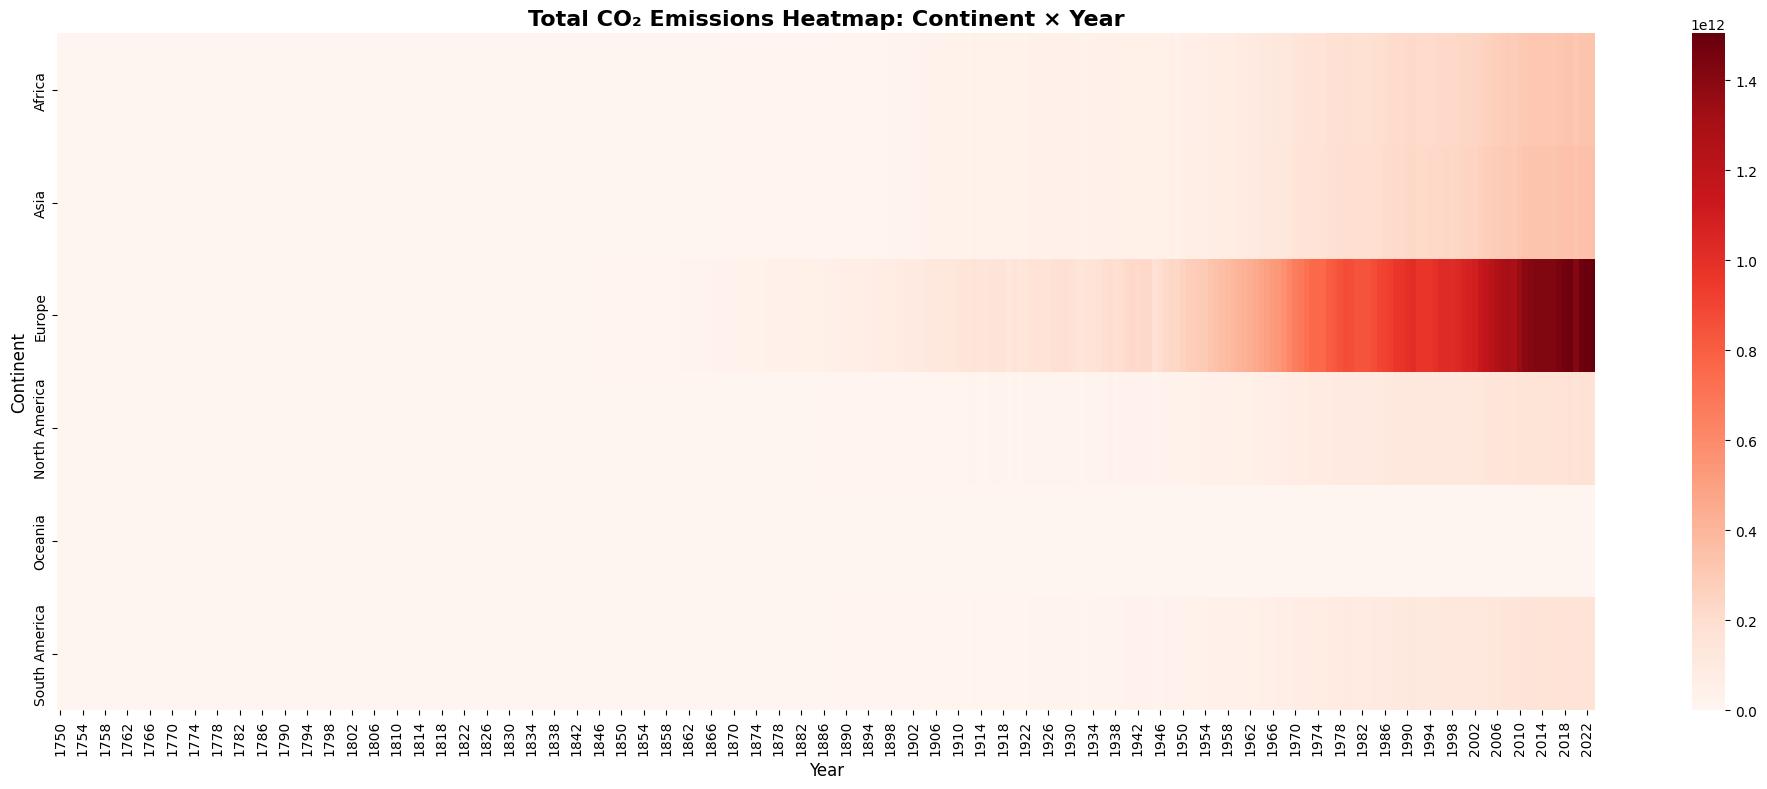

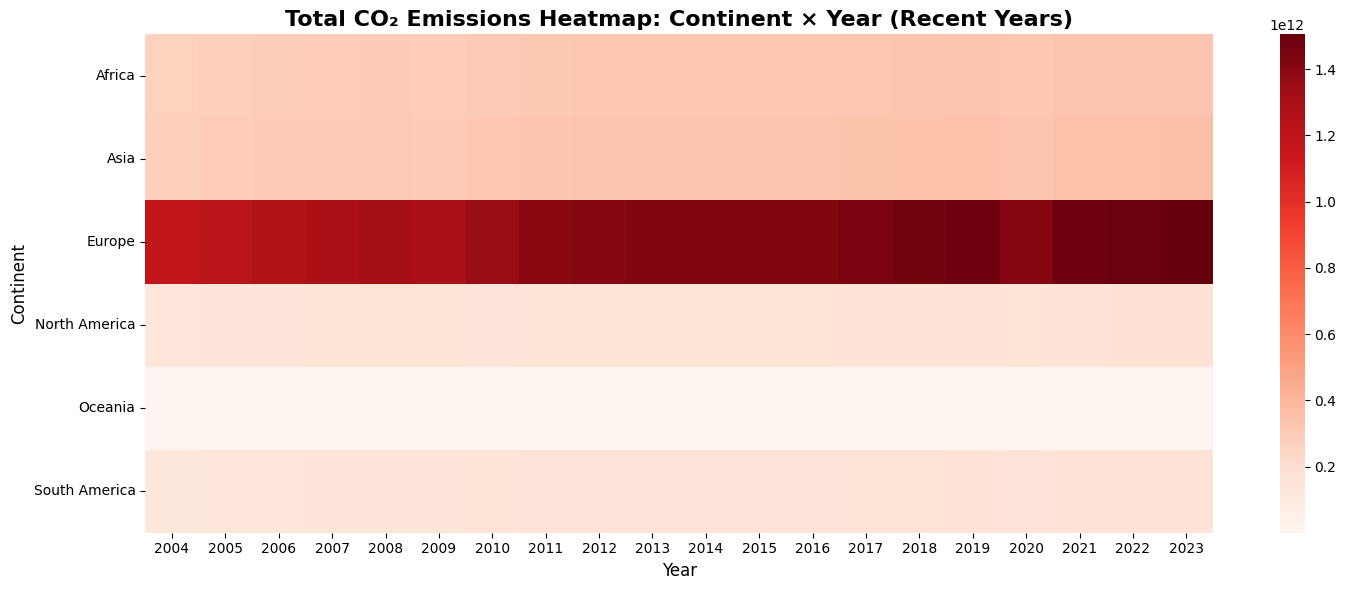

In [113]:
plt.figure(figsize=(20, 8))
sns.heatmap(continent_year_matrix, annot=False, cmap='Reds', fmt='.0f')
plt.title('Total CO₂ Emissions Heatmap: Continent × Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Continent', fontsize=12)
plt.tight_layout()
plt.savefig('continent_year_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

recent_years_matrix = continent_year_matrix.iloc[:, -20:]
plt.figure(figsize=(15, 6))
sns.heatmap(recent_years_matrix, annot=False, cmap='Reds', fmt='.0f')
plt.title('Total CO₂ Emissions Heatmap: Continent × Year (Recent Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Continent', fontsize=12)
plt.tight_layout()
plt.savefig('continent_year_heatmap_recent.png', dpi=300, bbox_inches='tight')
plt.show()


### 4. Growth Rate Analysis


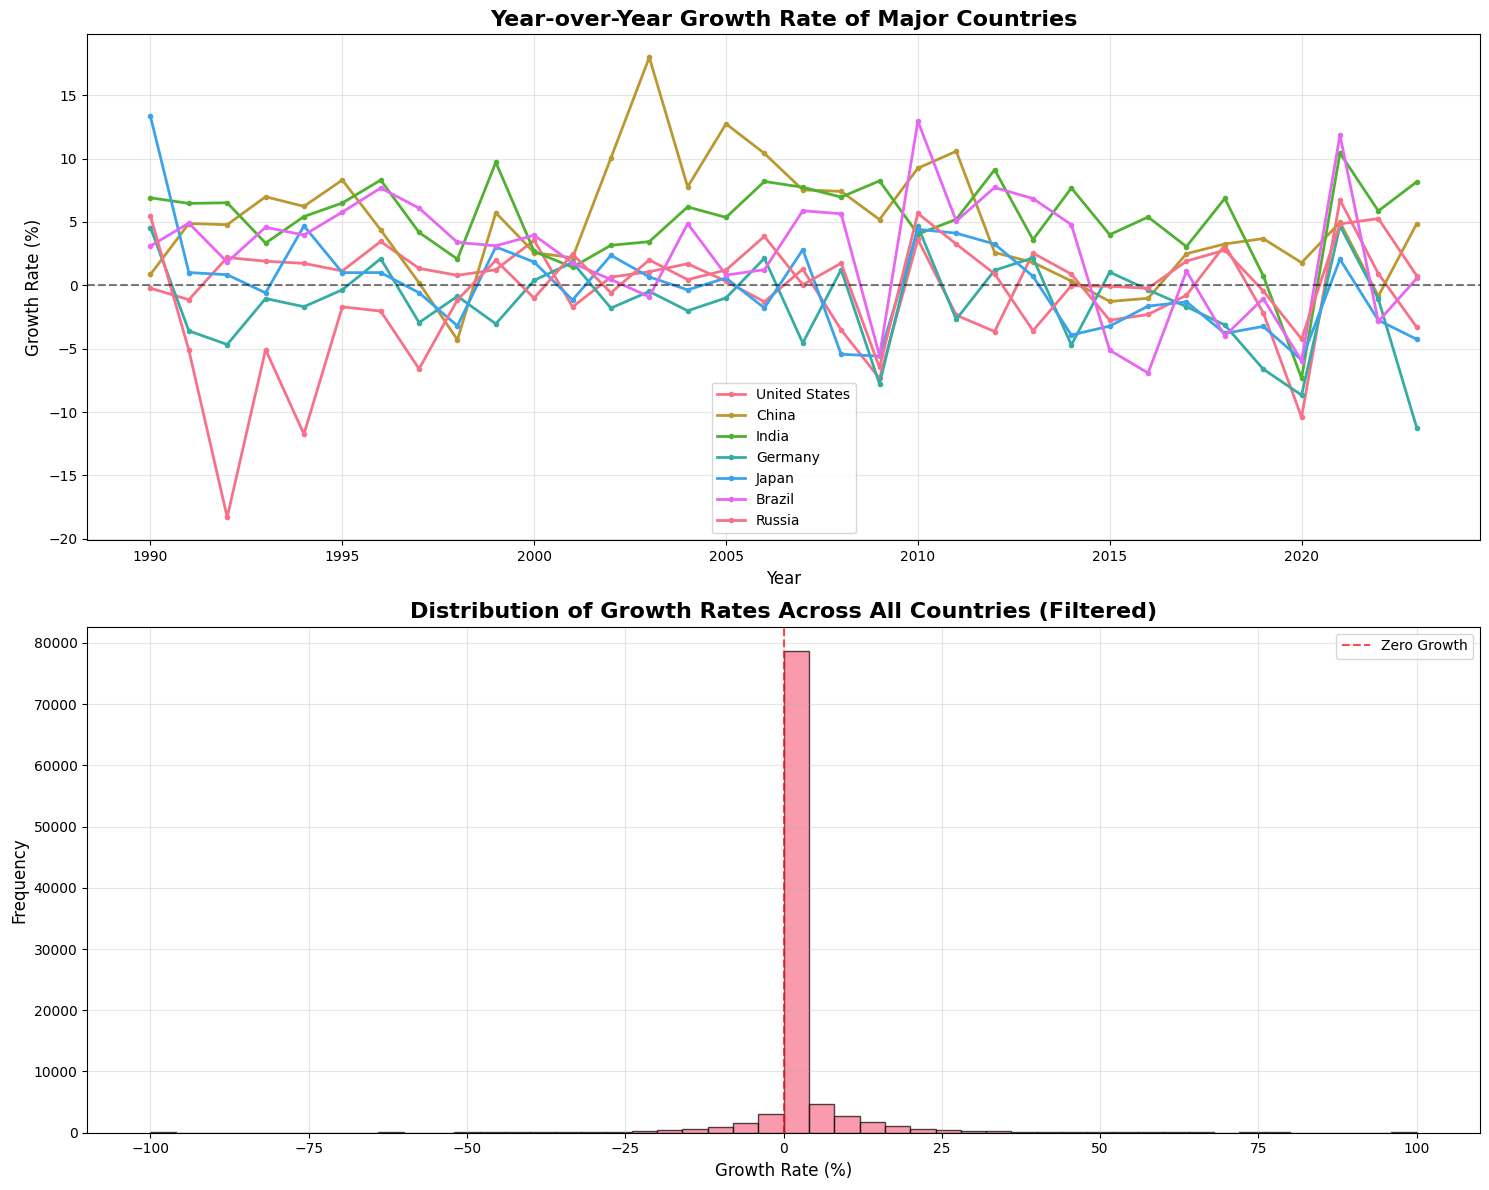

Total growth rate observations: 100304
Finite growth rate observations: 100252
Filtered growth rate observations: 99718
Growth rate statistics (filtered):
  Mean: 1.29%
  Median: 0.00%
  Std: 9.68%


In [114]:
major_countries = ['United States', 'China', 'India', 'Germany', 'Japan', 'Brazil', 'Russia']
major_growth_data = emissions_with_growth[
    (emissions_with_growth['Entity_em'].isin(major_countries)) & 
    (emissions_with_growth['Year_em'] >= 1990)
].copy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

for country in major_countries:
    country_data = major_growth_data[major_growth_data['Entity_em'] == country]
    if not country_data.empty:
        ax1.plot(country_data['Year_em'], country_data['growth_rate'], 
                label=country, linewidth=2, marker='o', markersize=3)

ax1.set_title('Year-over-Year Growth Rate of Major Countries', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Growth Rate (%)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

growth_rates_all = emissions_with_growth['growth_rate'].dropna()
growth_rates_finite = growth_rates_all[np.isfinite(growth_rates_all)]
growth_rates_filtered = growth_rates_finite[
    (growth_rates_finite >= -100) & (growth_rates_finite <= 100)
]

ax2.hist(growth_rates_filtered, bins=50, alpha=0.7, edgecolor='black')
ax2.set_title('Distribution of Growth Rates Across All Countries (Filtered)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Growth Rate (%)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero Growth')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('growth_rate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total growth rate observations: {len(growth_rates_all)}")
print(f"Finite growth rate observations: {len(growth_rates_finite)}")
print(f"Filtered growth rate observations: {len(growth_rates_filtered)}")
print(f"Growth rate statistics (filtered):")
print(f"  Mean: {growth_rates_filtered.mean():.2f}%")
print(f"  Median: {growth_rates_filtered.median():.2f}%")
print(f"  Std: {growth_rates_filtered.std():.2f}%")


### 5. Final Summary Dashboard


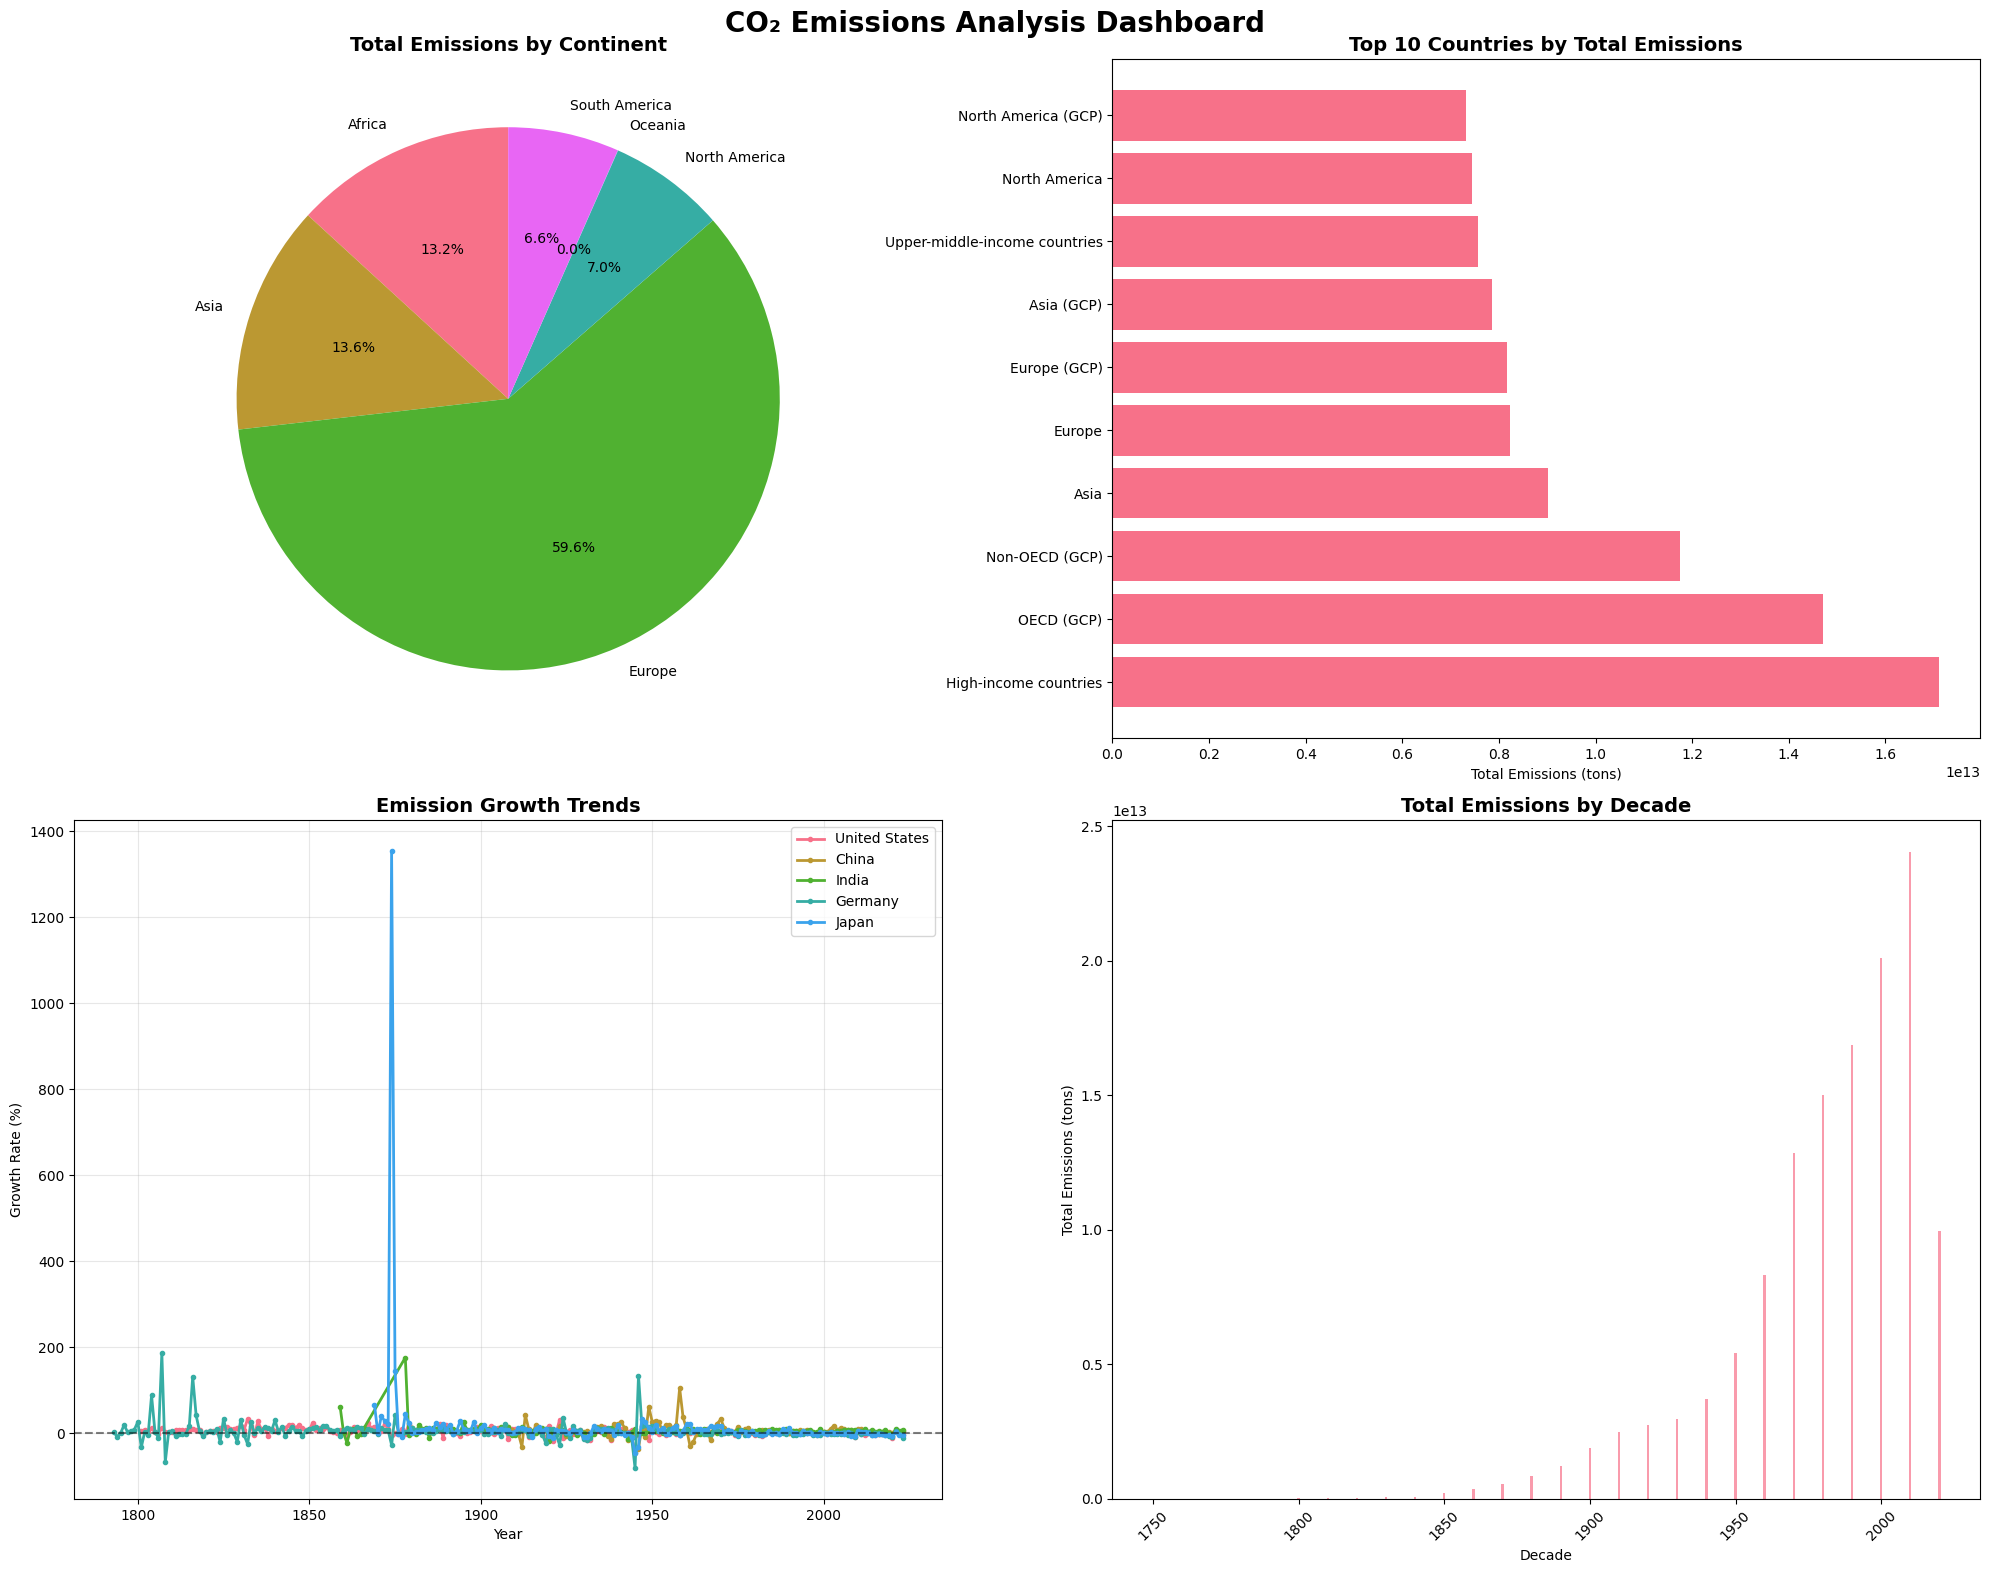

In [115]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

continent_totals = emissions.groupby('continent')['annual_emissions'].sum()
ax1.pie(continent_totals.values, labels=continent_totals.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Total Emissions by Continent', fontsize=14, fontweight='bold')

top_countries = emissions.groupby('Entity_em')['annual_emissions'].sum().sort_values(ascending=False).head(10)
ax2.barh(range(len(top_countries)), top_countries.values)
ax2.set_yticks(range(len(top_countries)))
ax2.set_yticklabels(top_countries.index)
ax2.set_title('Top 10 Countries by Total Emissions', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Emissions (tons)')

major_countries = ['United States', 'China', 'India', 'Germany', 'Japan']
for country in major_countries:
    country_data = emissions_with_growth[emissions_with_growth['Entity_em'] == country]
    if not country_data.empty:
        ax3.plot(country_data['Year_em'], country_data['growth_rate'], 
                label=country, linewidth=2, marker='o', markersize=3)
ax3.set_title('Emission Growth Trends', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Growth Rate (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)

decade_totals = decade_stats.groupby('decade')['total_emissions'].sum()
ax4.bar(decade_totals.index, decade_totals.values, alpha=0.7)
ax4.set_title('Total Emissions by Decade', fontsize=14, fontweight='bold')
ax4.set_xlabel('Decade')
ax4.set_ylabel('Total Emissions (tons)')
ax4.tick_params(axis='x', rotation=45)

plt.suptitle('CO₂ Emissions Analysis Dashboard', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('emissions_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


In [116]:
import os

png_files = [
    'emissions_by_continent.png',
    'top_3_entities_per_continent.png', 
    'continent_year_heatmap.png',
    'continent_year_heatmap_recent.png',
    'growth_rate_analysis.png',
    'emissions_dashboard.png'
]

print("PNG files generated:")
for file in png_files:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024
        print(f"✓ {file} ({size:.1f} KB)")
    else:
        print(f"✗ {file} (not found)")

print(f"\nTotal files: {len(png_files)}")
print("All visualizations have been saved as high-resolution PNG files (300 DPI)")


PNG files generated:
✓ emissions_by_continent.png (326.3 KB)
✓ top_3_entities_per_continent.png (176.9 KB)
✓ continent_year_heatmap.png (197.8 KB)
✓ continent_year_heatmap_recent.png (125.6 KB)
✓ growth_rate_analysis.png (833.4 KB)
✓ emissions_dashboard.png (618.7 KB)

Total files: 6
All visualizations have been saved as high-resolution PNG files (300 DPI)
